___

In [1]:
# Import libraries to be used

# Warning messages display
# import warnings
# warnings.filterwarnings(action='once') # https://docs.python.org/3/library/warnings.html#the-warnings-filter

# Directories/Files management
import os.path
## from zipfile import ZipFile # De momento no ha hecho falta 

# Timing
import time

# Data analysis and wrangling
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) # Show all columns in DataFrames
pd.set_option('display.max_rows', 100) # If too high, it greatly slows down the output display and freezes the kernel


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot') # choose a style: 'plt.style.available'
sns.set_theme(context='notebook',
              style="darkgrid") # {darkgrid, whitegrid, dark, white, ticks}
palette = sns.color_palette("flare", as_cmap=True);
import altair as alt

# Machine Learning
## from sklearn.[...] import ...

In [2]:
%load_ext memory_profiler

In [3]:
t0 = time.perf_counter() 

In [4]:
# Detect Operating System running and manage paths accordingly

if os.name == 'nt': # Windows
    root = r"C:\Users\turge\CompartidoVM\0.TFM"
    print("Running on Windows.")
elif os.name == 'posix': # Ubuntu
    root = "/home/dsc/shared/0.TFM"
    print("Running on Ubuntu.")
print("root path\t", root)

Running on Windows.
root path	 C:\Users\turge\CompartidoVM\0.TFM


___

## 1. Load the dataset

In [5]:
cols = [
 'MONTH',
 'DAY_OF_MONTH',
 'DAY_OF_WEEK',
 'OP_UNIQUE_CARRIER',
 'ORIGIN',
#  'WBAN_Origin_OTP', # Redundant having the 'ORIGIN' feature
 'DEST',
#  'WBAN_Dest_OTP', # Redundant having the 'DEST' feature
 'DEP_TIME_hour',
 'TAXI_OUT_median',
 'TAXI_IN_median',
 'ARR_TIME_hour',
 'CRS_ELAPSED_TIME',
 'DISTANCE',
#  'DISTANCE_GROUP', # Redundant having the 'DISTANCE' feature
#  'STATION_Origin', # Redundant having the 'ORIGIN' feature
#  'WMO_Origin', # Redundant having the 'ORIGIN' feature
#  'WBAN_Origin_LCD', # Redundant having the 'ORIGIN' feature
 'HourlyAltimeterSetting_Origin',
 'HourlyDryBulbTemperature_Origin',
 'HourlyPrecipitation_Origin',
 'HourlyRelativeHumidity_Origin',
 'HourlySkyConditions_Origin',
 'HourlyVisibility_Origin',
#  'REM_Origin', # Not relevant for the model
#  'STATION_Dest', # Redundant having the 'DEST' feature
#  'WMO_Dest', # Redundant having the 'DEST' feature
#  'WBAN_Dest_LCD', # Redundant having the 'DEST' feature
 'HourlyAltimeterSetting_Dest',
 'HourlyDryBulbTemperature_Dest',
 'HourlyPrecipitation_Dest',
 'HourlyRelativeHumidity_Dest',
 'HourlySkyConditions_Dest',
 'HourlyVisibility_Dest',
#  'REM_Dest', # Redundant having the 'ORIGIN' feature
 'ARR_DEL15' # → Target !!
]

In [6]:
preprocessed_input_csv_path = os.path.join(root,
                                           "Output_Data",
                                           "US_DoT-NOAA",
                                           "OTP_LCD_allColumns.csv")
preprocessed_input_csv_path

'C:\\Users\\turge\\CompartidoVM\\0.TFM\\Output_Data\\US_DoT-NOAA\\OTP_LCD_allColumns.csv'

In [7]:
%%time

df_all = pd.read_csv(preprocessed_input_csv_path,
                     encoding='latin1',
                     usecols=cols,
                     dtype={
                            'MONTH' : 'category',
                            'DAY_OF_MONTH' : 'category',
                            'DAY_OF_WEEK' : 'category',
                            'OP_UNIQUE_CARRIER' : 'category',
                            'ORIGIN' : 'string',
                            'DEST' : 'string',
                            'DEP_TIME_hour' : 'category',
                            'TAXI_OUT_median' : 'int32',
                            'TAXI_IN_median' : 'int32',
                            'ARR_TIME_hour' : 'category',
                            'CRS_ELAPSED_TIME' : 'int32',
                            'DISTANCE' : 'int32',
                            'HourlyAltimeterSetting_Origin' : 'float32',
                            'HourlyDryBulbTemperature_Origin' : 'float32',
                            'HourlyPrecipitation_Origin' : 'float32',
                            'HourlyRelativeHumidity_Origin' : 'float32',
                            'HourlySkyConditions_Origin' : 'category',
                            'HourlyVisibility_Origin' : 'float32',
                            'HourlyAltimeterSetting_Dest' : 'float32',
                            'HourlyDryBulbTemperature_Dest' : 'float32',
                            'HourlyPrecipitation_Dest' : 'float32',
                            'HourlyRelativeHumidity_Dest' : 'float32',
                            'HourlySkyConditions_Dest' : 'category',
                            'HourlyVisibility_Dest' : 'float32',
                            'ARR_DEL15' : 'int32'
                           }
                    )
df_all.sample(5)

Wall time: 45.9 s


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME_hour,TAXI_OUT_median,TAXI_IN_median,ARR_DEL15,ARR_TIME_hour,CRS_ELAPSED_TIME,DISTANCE,HourlyAltimeterSetting_Origin,HourlyDryBulbTemperature_Origin,HourlyPrecipitation_Origin,HourlyRelativeHumidity_Origin,HourlySkyConditions_Origin,HourlyVisibility_Origin,HourlyAltimeterSetting_Dest,HourlyDryBulbTemperature_Dest,HourlyPrecipitation_Dest,HourlyRelativeHumidity_Dest,HourlySkyConditions_Dest,HourlyVisibility_Dest
4632700,07,02,2,AA,SAN,ORD,22,19,14,0,0,247,1723,29.920000,67.0,0.0,79.0,(missing),9.94,29.910000,79.0,0.0,77.0,(missing),9.94
4176093,12,25,3,EV,ORD,PVD,14,24,6,0,17,147,849,29.830000,57.0,0.0,62.0,BKN,10.00,30.180000,36.0,0.0,79.0,BKN,10.00
2153684,10,10,4,WN,DAL,PHX,9,10,5,0,10,160,879,29.870001,80.0,0.0,71.0,OVC,10.00,29.840000,81.0,0.0,28.0,CLR,10.00
938535,02,11,1,UA,LAS,IAH,6,16,7,0,10,173,1222,30.090000,34.0,0.0,44.0,CLR,10.00,29.940001,70.0,0.0,90.0,OVC,10.00
178890,05,12,7,AA,DFW,ORD,13,16,14,0,15,142,801,29.879999,75.0,0.0,46.0,FEW,10.00,29.830000,49.0,0.0,61.0,OVC,10.00


In [8]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200051 entries, 0 to 7200050
Data columns (total 25 columns):
 #   Column                           Dtype   
---  ------                           -----   
 0   MONTH                            category
 1   DAY_OF_MONTH                     category
 2   DAY_OF_WEEK                      category
 3   OP_UNIQUE_CARRIER                category
 4   ORIGIN                           string  
 5   DEST                             string  
 6   DEP_TIME_hour                    category
 7   TAXI_OUT_median                  int32   
 8   TAXI_IN_median                   int32   
 9   ARR_DEL15                        int32   
 10  ARR_TIME_hour                    category
 11  CRS_ELAPSED_TIME                 int32   
 12  DISTANCE                         int32   
 13  HourlyAltimeterSetting_Origin    float32 
 14  HourlyDryBulbTemperature_Origin  float32 
 15  HourlyPrecipitation_Origin       float32 
 16  HourlyRelativeHumidity_Origin    flo

## 2. Dataset overview

In [9]:
# For the initial runs, define a reasonably-sized sample:
sample_length = int(1e6)

# The dataset is somehow imbalanced (80% on-time / 20% delayed), so let's perform some quick undersampling:
delayed = df_all[df_all['ARR_DEL15'] == 1].sample(sample_length // 2)
ontime = df_all[df_all['ARR_DEL15'] == 0].sample(sample_length // 2)
df = delayed.append(ontime)

# Get dummies for the categorical features:
df = pd.get_dummies(data=df, columns=df.select_dtypes('category').columns)

print("On-time flights: {:7d} ({:5.2f}%)".format(len(ontime), 100*len(ontime)/len(df)))
print("Delayed flights: {:7d} ({:5.2f}%)".format(len(delayed), 100*len(delayed)/len(df)))

On-time flights:  500000 (50.00%)
Delayed flights:  500000 (50.00%)


### Train / Test / Validation split
Break the dataset into three blocks:
1. Training (70%)
2. Test (15%)
3. Validation (15%)

In [10]:
def target_encoder(df, column, target, index=None, method='mean'):
    """
    Target-based encoding is numerization of a categorical variables via the target variable. Main purpose is to deal
    with high cardinality categorical features without exploding dimensionality. This replaces the categorical variable
    with just one new numerical variable. Each category or level of the categorical variable is represented by a
    summary statistic of the target for that level.
    Args:
        df (pandas df): Pandas DataFrame containing the categorical column and target.
        column (str): Categorical variable column to be encoded.
        target (str): Target on which to encode.
        index (arr): Can be supplied to use targets only from the train index. Avoids data leakage from the test fold
        method (str): Summary statistic of the target. Mean, median or std. deviation.
    Returns:
        arr: Encoded categorical column.
    """

    index = df.index if index is None else index # Encode the entire input df if no specific indices is supplied

    if method == 'mean':
        encoded_column = df[column].map(df.iloc[index].groupby(column)[target].mean())
    elif method == 'median':
        encoded_column = df[column].map(df.iloc[index].groupby(column)[target].median())
    elif method == 'std':
        encoded_column = df[column].map(df.iloc[index].groupby(column)[target].std())
    else:
        raise ValueError("Incorrect method supplied: '{}'. Must be one of 'mean', 'median', 'std'".format(method))

    return encoded_column

In [11]:
# Divide the data:
train_idx = df.sample(frac=0.7).index
df['ORIGIN_Encoded'] = target_encoder(df_all, column='ORIGIN', target='ARR_DEL15', index=train_idx, method='mean')
df['DEST_Encoded'] = target_encoder(df_all, column='DEST', target='ARR_DEL15', index=train_idx, method='mean')
df.drop(['ORIGIN', 'DEST'], axis=1, inplace=True)
# df['ORIGIN_Encoded'] = target_encoder(df_all, column='ORIGIN', target='ARR_DEL15', method='mean')
# df['DEST_Encoded'] = target_encoder(df_all, column='DEST', target='ARR_DEL15', method='mean')
train = df.loc[train_idx, :]
test_valid = df.drop(train.index)
test = test_valid.sample(frac=0.5)
valid = test_valid.drop(test.index)

print("Total dataset:      {:7d} ({:6.2f}%)".format(len(df), 100*len(df)/len(df)))
print("Training dataset:   {:7d} ( {:5.2f}%)".format(len(train), 100*len(train)/len(df)))
print("Test dataset:       {:7d} ( {:5.2f}%)".format(len(test), 100*len(test)/len(df)))
print("Validation dataset: {:7d} ( {:5.2f}%)".format(len(valid), 100*len(valid)/len(df)))

Total dataset:      1000000 (100.00%)
Training dataset:    700000 ( 70.00%)
Test dataset:        150000 ( 15.00%)
Validation dataset:  150000 ( 15.00%)


In [12]:
df.sample(1)

,TAXI_OUT_median,TAXI_IN_median,ARR_DEL15,CRS_ELAPSED_TIME,DISTANCE,HourlyAltimeterSetting_Origin,HourlyDryBulbTemperature_Origin,HourlyPrecipitation_Origin,HourlyRelativeHumidity_Origin,HourlyVisibility_Origin,HourlyAltimeterSetting_Dest,HourlyDryBulbTemperature_Dest,HourlyPrecipitation_Dest,HourlyRelativeHumidity_Dest,HourlyVisibility_Dest,MONTH_01,MONTH_02,MONTH_03,MONTH_04,MONTH_05,MONTH_06,MONTH_07,MONTH_08,MONTH_09,MONTH_10,MONTH_11,MONTH_12,DAY_OF_MONTH_01,DAY_OF_MONTH_02,DAY_OF_MONTH_03,DAY_OF_MONTH_04,DAY_OF_MONTH_05,DAY_OF_MONTH_06,DAY_OF_MONTH_07,DAY_OF_MONTH_08,DAY_OF_MONTH_09,DAY_OF_MONTH_10,DAY_OF_MONTH_11,DAY_OF_MONTH_12,DAY_OF_MONTH_13,DAY_OF_MONTH_14,DAY_OF_MONTH_15,DAY_OF_MONTH_16,DAY_OF_MONTH_17,DAY_OF_MONTH_18,DAY_OF_MONTH_19,DAY_OF_MONTH_20,DAY_OF_MONTH_21,DAY_OF_MONTH_22,DAY_OF_MONTH_23,DAY_OF_MONTH_24,DAY_OF_MONTH_25,DAY_OF_MONTH_26,DAY_OF_MONTH_27,DAY_OF_MONTH_28,DAY_OF_MONTH_29,DAY_OF_MONTH_30,DAY_OF_MONTH_31,DAY_OF_WEEK_1,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7,OP_UNIQUE_CARRIER_9E,OP_UNIQUE_CARRIER_AA,OP_UNIQUE_CARRIER_AS,OP_UNIQUE_CARRIER_B6,OP_UNIQUE_CARRIER_DL,OP_UNIQUE_CARRIER_EV,OP_UNIQUE_CARRIER_F9,OP_UNIQUE_CARRIER_G4,OP_UNIQUE_CARRIER_MQ,OP_UNIQUE_CARRIER_NK,OP_UNIQUE_CARRIER_OH,OP_UNIQUE_CARRIER_OO,OP_UNIQUE_CARRIER_UA,OP_UNIQUE_CARRIER_WN,OP_UNIQUE_CARRIER_YV,OP_UNIQUE_CARRIER_YX,OP_UNIQUE_CARRIER_HA,DEP_TIME_hour_0,DEP_TIME_hour_10,DEP_TIME_hour_11,DEP_TIME_hour_12,DEP_TIME_hour_13,DEP_TIME_hour_14,DEP_TIME_hour_15,DEP_TIME_hour_16,DEP_TIME_hour_17,DEP_TIME_hour_18,DEP_TIME_hour_19,DEP_TIME_hour_20,DEP_TIME_hour_22,DEP_TIME_hour_23,DEP_TIME_hour_6,DEP_TIME_hour_7,DEP_TIME_hour_8,DEP_TIME_hour_9,DEP_TIME_hour_21,ARR_TIME_hour_10,ARR_TIME_hour_11,ARR_TIME_hour_12,ARR_TIME_hour_13,ARR_TIME_hour_14,ARR_TIME_hour_15,ARR_TIME_hour_16,ARR_TIME_hour_17,ARR_TIME_hour_18,ARR_TIME_hour_19,ARR_TIME_hour_20,ARR_TIME_hour_21,ARR_TIME_hour_6,ARR_TIME_hour_7,ARR_TIME_hour_8,ARR_TIME_hour_9,ARR_TIME_hour_22,ARR_TIME_hour_23,ARR_TIME_hour_0,HourlySkyConditions_Origin_(missing),HourlySkyConditions_Origin_BKN,HourlySkyConditions_Origin_CLR,HourlySkyConditions_Origin_FEW,HourlySkyConditions_Origin_OVC,HourlySkyConditions_Origin_SCT,HourlySkyConditions_Origin_VV,HourlySkyConditions_Dest_(missing),HourlySkyConditions_Dest_BKN,HourlySkyConditions_Dest_CLR,HourlySkyConditions_Dest_FEW,HourlySkyConditions_Dest_OVC,HourlySkyConditions_Dest_SCT,HourlySkyConditions_Dest_VV,ORIGIN_Encoded,DEST_Encoded
2109543,13,13,0,118,473,30.030001,46.0,0.0,66.0,10.0,30.014999,55.0,0.0,57.0,9.94,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0.473753,0.552691


# XGBoost

In [13]:
from xgboost import XGBClassifier

In [14]:
# Train / Test partition:
X_train, y_train = train.drop("ARR_DEL15", axis=1), train["ARR_DEL15"]
X_test, y_test = test.drop("ARR_DEL15", axis=1), test["ARR_DEL15"]

# Validation:
X_valid, y_valid = valid.drop("ARR_DEL15", axis=1), valid["ARR_DEL15"]

In [15]:
# Basic model definition:
xgb_model = XGBClassifier(use_label_encoder=False, verbosity=1, random_state=0,
                          n_estimators=300,
                          max_depth= 4,
                          learning_rate=0.0001,
                          objective= 'binary:logistic',
                          booster='gbtree',
                          tree_method='auto')

## Training

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700000 entries, 4754418 to 4049621
Columns: 136 entries, TAXI_OUT_median to DEST_Encoded
dtypes: float32(10), float64(2), int32(5), uint8(119)
memory usage: 135.5 MB


In [17]:
xgb_model.fit(X_train, y_train,
              eval_set=[(X_train, y_train), (X_test, y_test), (X_valid, y_valid)],
              eval_metric='auc',
              verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.0001, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='auto', use_label_encoder=False,
              validate_parameters=1, verbosity=1)

<em>
Probar con:

- `logloss`: negative log-likelihood
- `auc`: Area under the curve. Available for binary classification and learning-to-rank tasks.
- `aucpr`: Area under the PR curve. Available for binary classification and learning-to-rank tasks.
    
Source: https://xgboost.readthedocs.io/en/latest/parameter.html
</em>

In [18]:
# Get parameters:
xgb_model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.0001,
 'max_delta_step': 0,
 'max_depth': 4,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 300,
 'n_jobs': 4,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'auto',
 'validate_parameters': 1,
 'verbosity': 1}

## Evaluation

### Evaluation metric results (here, `auc`)

In [19]:
# Evaluation results for all passed eval_sets.
# Validation metrics will help us track the performance of the model:
evals_result = xgb_model.evals_result()
evals_result

{'validation_0': OrderedDict([('auc',
               [0.613799,
                0.613799,
                0.613799,
                0.613799,
                0.613799,
                0.613799,
                0.613799,
                0.613799,
                0.613799,
                0.613799,
                0.613799,
                0.613799,
                0.613799,
                0.613799,
                0.613799,
                0.613799,
                0.613799,
                0.613799,
                0.613799,
                0.613799,
                0.613799,
                0.613799,
                0.613799,
                0.613799,
                0.613799,
                0.613799,
                0.613799,
                0.613799,
                0.613799,
                0.613799,
                0.613799,
                0.613799,
                0.613799,
                0.613799,
                0.613799,
                0.613799,
                0.613799,


### Additional metrics results

In [20]:
# Evaluate the model's metrics:

from sklearn.metrics import fbeta_score, f1_score, recall_score, precision_score, accuracy_score, \
                            confusion_matrix, classification_report, roc_curve, roc_auc_score, plot_roc_curve

def clf_metrics(classifier, y_test, y_pred):
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    print("Normalized confusion matrix:\n", confusion_matrix(y_test, y_pred, normalize='true'), '\n')
    print(classification_report(y_test, y_pred, target_names=['on-time', 'delayed']))
    print("F-beta (ß=2) = {:6.3f}".format(fbeta_score(y_test, y_pred, beta=2)))   
    print("F1 =           {:6.3f}".format(f1_score(y_test, y_pred)))   
    print("Recall =       {:6.3f}".format(recall_score(y_test, y_pred)))   
    print("Precision =    {:6.3f}".format(precision_score(y_test, y_pred)))   
    print("Accuracy =     {:6.3f}".format(accuracy_score(y_test, y_pred)))

### Test

In [21]:
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)
y_valid_pred = xgb_model.predict(X_valid)
y_test_pred

array([1, 0, 1, ..., 1, 1, 0])

In [22]:
print("-+-+-+ TRAINING dataset +-+-+-\n")
clf_metrics(xgb_model, y_train, y_train_pred)
print("-------------------------------------------------------\n")
print("-+-+-+ TEST dataset: +-+-+-\n")
clf_metrics(xgb_model, y_test, y_test_pred)
print("-------------------------------------------------------\n")
print("-+-+-+ VALIDATION dataset: +-+-+-\n")
clf_metrics(xgb_model, y_valid, y_valid_pred)

-+-+-+ TRAINING dataset +-+-+-

Confusion matrix:
 [[165749 184096]
 [107860 242295]]
Normalized confusion matrix:
 [[0.47377839 0.52622161]
 [0.30803501 0.69196499]] 

              precision    recall  f1-score   support

     on-time       0.61      0.47      0.53    349845
     delayed       0.57      0.69      0.62    350155

    accuracy                           0.58    700000
   macro avg       0.59      0.58      0.58    700000
weighted avg       0.59      0.58      0.58    700000

F-beta (ß=2) =  0.663
F1 =            0.624
Recall =        0.692
Precision =     0.568
Accuracy =      0.583
-------------------------------------------------------

-+-+-+ TEST dataset: +-+-+-

Confusion matrix:
 [[35522 39583]
 [23041 51854]]
Normalized confusion matrix:
 [[0.47296452 0.52703548]
 [0.30764403 0.69235597]] 

              precision    recall  f1-score   support

     on-time       0.61      0.47      0.53     75105
     delayed       0.57      0.69      0.62     74895

    accurac

### ROC curve

In [23]:
y_train_probabilities = xgb_model.predict_proba(X_train)[:,1]
y_test_probabilities = xgb_model.predict_proba(X_test)[:,1]
y_valid_probabilities = xgb_model.predict_proba(X_valid)[:,1]
y_test_probabilities[:10]

array([0.5021496 , 0.49737892, 0.5001362 , 0.50262725, 0.4977378 ,
       0.5001362 , 0.49810594, 0.49737892, 0.49737892, 0.5001362 ],
      dtype=float32)

In [24]:
fpr_train, tpr_train, _ = roc_curve(y_train,  y_train_probabilities)
fpr_test, tpr_test, _ = roc_curve(y_test,  y_test_probabilities)
fpr_valid, tpr_valid, _ = roc_curve(y_valid,  y_valid_probabilities)

auc_train = roc_auc_score(y_train, y_train_probabilities)
auc_test = roc_auc_score(y_test, y_test_probabilities)
auc_valid = roc_auc_score(y_valid, y_valid_probabilities)

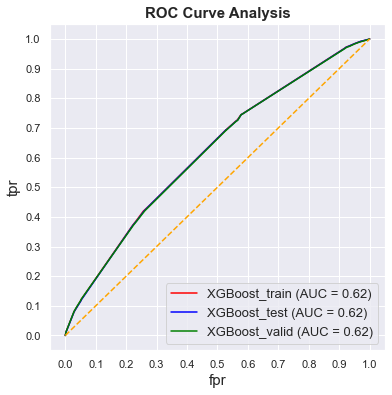

In [25]:
# Plot the figure:
fig, ax = plt.subplots(figsize=(6,6))

plot_roc_curve(xgb_model, X_train, y_train, color='red', ax=ax, name='XGBoost_train')
plot_roc_curve(xgb_model, X_test, y_test, color='blue', ax=ax, name='XGBoost_test')
plot_roc_curve(xgb_model, X_valid, y_valid, color='green', ax=ax, name='XGBoost_valid')
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("fpr", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("tpr", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

## Plotting

### Feature importance (data)

In [26]:
# Let's build a dictionary to better see each feature with its corresponding importance:
feature_importance_dict = dict(zip(X_train.columns, xgb_model.feature_importances_))
feature_importance_dict

{'TAXI_OUT_median': 0.0,
 'TAXI_IN_median': 0.0,
 'CRS_ELAPSED_TIME': 0.009270937,
 'DISTANCE': 0.0,
 'HourlyAltimeterSetting_Origin': 0.0,
 'HourlyDryBulbTemperature_Origin': 0.023447506,
 'HourlyPrecipitation_Origin': 0.0,
 'HourlyRelativeHumidity_Origin': 0.0,
 'HourlyVisibility_Origin': 0.07539352,
 'HourlyAltimeterSetting_Dest': 0.0,
 'HourlyDryBulbTemperature_Dest': 0.0,
 'HourlyPrecipitation_Dest': 0.0,
 'HourlyRelativeHumidity_Dest': 0.28536263,
 'HourlyVisibility_Dest': 0.0,
 'MONTH_01': 0.0,
 'MONTH_02': 0.0,
 'MONTH_03': 0.0,
 'MONTH_04': 0.0,
 'MONTH_05': 0.0,
 'MONTH_06': 0.0,
 'MONTH_07': 0.0,
 'MONTH_08': 0.0,
 'MONTH_09': 0.0,
 'MONTH_10': 0.0,
 'MONTH_11': 0.0,
 'MONTH_12': 0.0,
 'DAY_OF_MONTH_01': 0.0,
 'DAY_OF_MONTH_02': 0.0,
 'DAY_OF_MONTH_03': 0.0,
 'DAY_OF_MONTH_04': 0.0,
 'DAY_OF_MONTH_05': 0.0,
 'DAY_OF_MONTH_06': 0.0,
 'DAY_OF_MONTH_07': 0.0,
 'DAY_OF_MONTH_08': 0.0,
 'DAY_OF_MONTH_09': 0.0,
 'DAY_OF_MONTH_10': 0.0,
 'DAY_OF_MONTH_11': 0.0,
 'DAY_OF_MONTH_12': 

### Feature importance (plot)

#### Weight-based

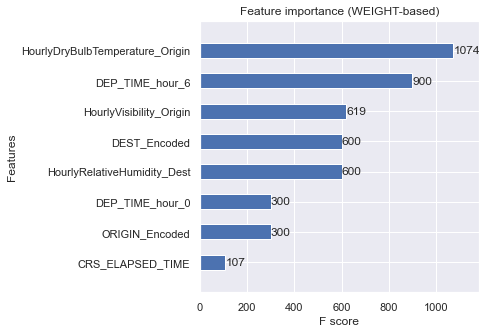

In [27]:
from xgboost import plot_importance

fig,ax = plt.subplots(figsize=(5,5))

plot_importance(booster=xgb_model,
                ax=ax,
                grid=True,
                importance_type='weight', # ”weight” is the number of times a feature appears in a tree
                max_num_features=None, 
                height=0.5,
                xlim=None,
                ylim=None, 
                title='Feature importance (WEIGHT-based)',
                xlabel='F score',
                ylabel='Features',
                show_values=True);

#### Gain-based

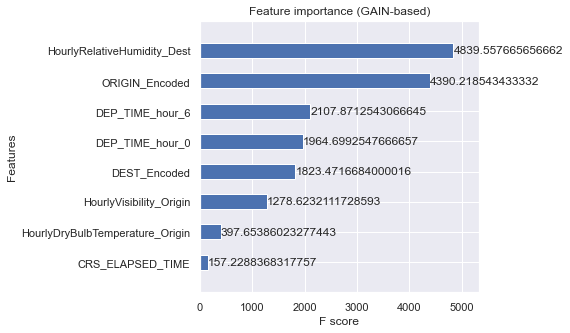

In [28]:
from xgboost import plot_importance

fig,ax = plt.subplots(figsize=(5,5))

plot_importance(booster=xgb_model,
                ax=ax,
                grid=True,
                importance_type='gain',
                max_num_features=None, 
                height=0.5,
                xlim=None,
                ylim=None, 
                title='Feature importance (GAIN-based)',
                xlabel='F score',
                ylabel='Features',
                show_values=True);

### Tree

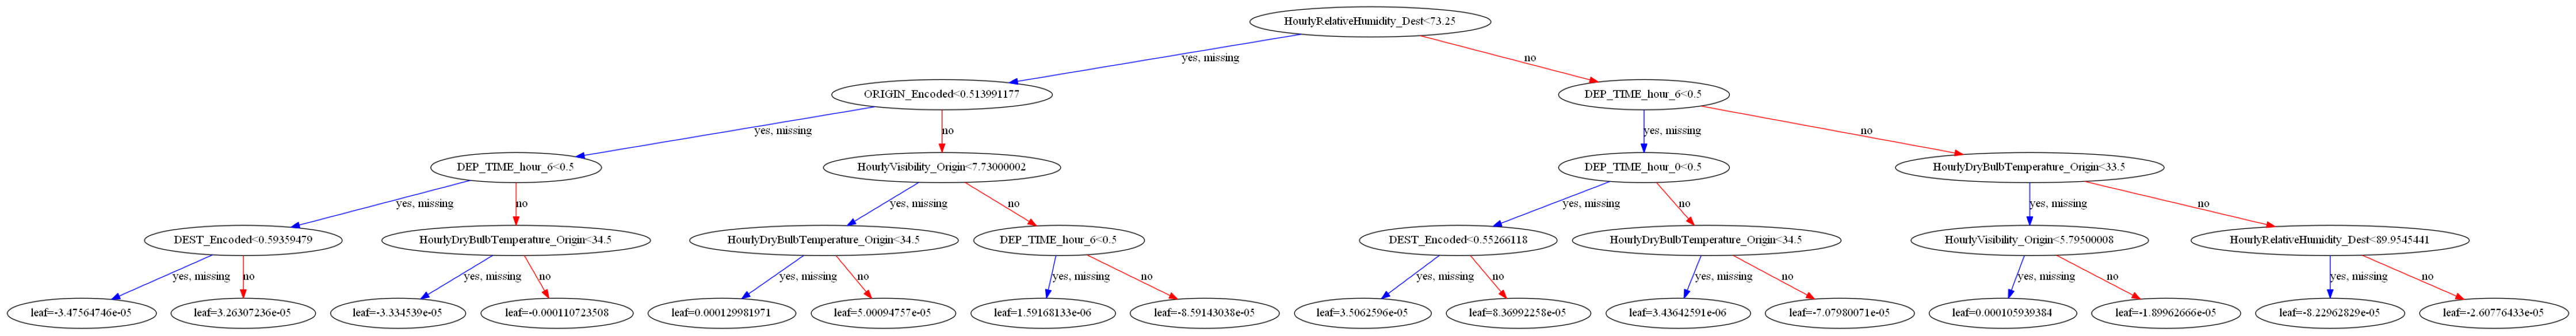

In [29]:
from xgboost import plot_tree

fig,ax = plt.subplots(figsize=(80,50))

plot_tree(booster=xgb_model,
          num_trees=0,
          ax=ax)

plt.savefig('plot_tree_16.png')

### Graphviz (tree)

*Convert specified tree to graphviz instance. IPython can automatically plot the returned graphiz instance. Otherwise, you should call `.render()` method of the returned graphiz instance.*

In [30]:
from xgboost import to_graphviz

tree_graphviz = to_graphviz(booster=xgb_model,
                            yes_color='#0000FF',
                            no_color='#FF0000',
                            condition_node_params={'shape': 'box',
                                                   'style': 'filled,rounded',
                                                   'fillcolor': '#78bceb'},
                            leaf_node_params={'shape': 'box',
                                              'style': 'filled',
                                              'fillcolor': '#e48038'})

format = 'png'
tree_graphviz = to_graphviz(xgb_model)
tree_graphviz.graph_attr = {'dpi':'400'}
tree_graphviz.render('tree_graphviz_16', format = format)

'tree_graphviz_16.png'

___

In [31]:
t1 = time.perf_counter() - t0
print("Time elapsed: {:2.0f}h {:2.0f}min {:2.0f}s".format(t1//3600, (t1%3600)//60, (t1%3600)%60))

Time elapsed:  0h 12min 45s


## Save the model

In [32]:
from joblib import dump, load

# Save model to file:
dump(xgb_model, "XGBoost_16.joblib.dat")
print("Saved model to: XGBoost_16.joblib.dat")

Saved model to: XGBoost_16.joblib.dat


In [33]:
# Load model from file:
loaded_model = load("XGBoost_16.joblib.dat")
print("Loaded model from: XGBoost_16.joblib.dat")

Loaded model from: XGBoost_16.joblib.dat


In [34]:
# Make predictions for test data
predictions = loaded_model.predict(X_test)

# Evaluate predictions:
recall = recall_score(y_test, predictions)
print("Loaded model recall: {:6.3f}".format(recall))

Loaded model recall:  0.692


___

___